# Housing Prices - Challenge 

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [4]:
house_it_6_v2 = pd.read_csv("your_path/housing-classification-iter6.csv")
pd.set_option('display.max_columns', None)
house_it_6_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   TotalBsmtSF    1460 non-null   int64  
 3   BedroomAbvGr   1460 non-null   int64  
 4   Fireplaces     1460 non-null   int64  
 5   PoolArea       1460 non-null   int64  
 6   GarageCars     1460 non-null   int64  
 7   WoodDeckSF     1460 non-null   int64  
 8   ScreenPorch    1460 non-null   int64  
 9   Expensive      1460 non-null   int64  
 10  MSZoning       1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Heating        1460 non-null   object 
 13  Street         1460 non-null   object 
 14  CentralAir     1460 non-null   object 
 15  Foundation     1460 non-null   object 
 16  ExterQual      1460 non-null   object 
 17  ExterCond      1460 non-null   object 
 18  BsmtQual

In [5]:
# Columns to drop
columns_to_drop = ['1stFlrSF', 'GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd', "Id"]

# Dropping the columns from the DataFrame
house_it_6_v2_2 = house_it_6_v2.drop(columns=columns_to_drop, axis=1)

## X and Y Creation & Data Splitting

In [ ]:
#X and y creation
x = house_it_6_v2_2
y = x.pop("Expensive")

#Data splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

## Pipeline

In [7]:
# select categorical and numerical column names
x_cat_columns = x.select_dtypes(exclude="number").copy().columns
x_num_columns = x.select_dtypes(include="number").copy().columns

# create numerical pipeline, only with the SimpleImputer(strategy="mean" and StandardScaler)
numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler())
 # create categorical pipeline, with the SimpleImputer(fill_value="N_A") and the OneHotEncoder
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(sparse_output=False, handle_unknown='ignore')
)

In [8]:
#Import
from sklearn.compose import ColumnTransformer

#Created the columntransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, x_num_columns), #1 branch called "num_pipe", will apply the steps in the numeric_pipe to the columns named in x_num_columns
        ("cat_pipe", categoric_pipe, x_cat_columns), #2 branch called "cat_pipe", will apply the steps in the categoric_pipe to the columns named in x_cat_columns
    ]
)

## Using Decision Tree Classifier

In [9]:
#Creating the full pipeline
full_pipeline = make_pipeline(preprocessor, 
                              DecisionTreeClassifier()).set_output(transform='pandas')

In [10]:
#Fit
full_pipeline.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'Yea...
       'Neighborhood', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtFinType2',
       'HeatingQC', 'Electrical', 'Functional', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

## Grid Search: Parameter Grid/ Cross Validation

In [14]:
#Create parameter grid
param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "decisiontreeclassifier__max_depth": range(2, 8),
    "decisiontreeclassifier__min_samples_leaf": range(2, 6),
    "decisiontreeclassifier__criterion":["gini", "entropy"]
}

In [17]:
#Define cross validation
search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1, 
                      error_score='raise')

In [18]:
search.fit(x_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubCla...
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                  'median'],
                         'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(2, 8),
                         'decisiontreeclassifier__min_samples_leaf': range(2, 6)},
             verbose=1)

## Accuracy, Precision and Recall

In [19]:
#Training accuracy
y_train_pred = search.predict(x_train)

train_accuracy = accuracy_score(y_train, y_train_pred)

train_accuracy_rounded = round(train_accuracy, 4)

print("The training data prediction is {:.2%} accurate".format(train_accuracy_rounded))

The training data prediction is 96.92% accurate


In [20]:
#Testing accuracy
y_test_pred = search.predict(x_test)

test_accuracy = accuracy_score(y_test, y_test_pred)

test_accuracy_rounded = round(test_accuracy, 4)

print("The test data prediction is {:.2%} accurate".format(test_accuracy_rounded))

The test data prediction is 93.84% accurate


In [21]:
from sklearn.metrics import precision_score

In [22]:
# Training Precision Score
train_precision_tree = precision_score(y_train, y_train_pred) 
train_precision_rounded_tree = round(train_precision_tree, 4)

print("The training data prediction is {:.2%} precision tree".format(train_precision_rounded_tree))

The training data prediction is 88.83% precision tree


In [23]:
#Testing Precision Score 
test_precision_tree = precision_score(y_test, y_test_pred) 
test_precision_rounded_tree = round(test_precision_tree, 4)

print("The test data prediction is {:.2%} precision tree".format(test_precision_rounded_tree))

The test data prediction is 75.00% precision tree


In [24]:
from sklearn.metrics import precision_score, recall_score
# Training Recall Score
train_recall_tree = recall_score(y_train, y_train_pred) 
train_recall_rounded_tree = round(train_recall_tree , 4)

print("The training data Recall Score is {:.2%} recall tree".format(train_recall_rounded_tree))

The training data Recall Score is 90.86% recall tree


In [25]:
# Testing Recall Score
test_recall_tree = recall_score(y_test, y_test_pred) 
test_recall_rounded_tree = round(test_recall_tree, 4)

print("The test data prediction is {:.2%} recall tree".format(test_recall_rounded_tree))

The test data prediction is 85.71% recall tree


In [26]:
from sklearn.metrics import confusion_matrix
# Confusion Matrix - Training

conf_matrix_train_tree = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix - Training:\n", conf_matrix_train_tree)


Confusion Matrix - Training:
 [[973  20]
 [ 16 159]]


In [27]:
# Confusion Matrix - Test
conf_matrix_test_tree = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix - Testing:\n", conf_matrix_test_tree)


Confusion Matrix - Testing:
 [[238  12]
 [  6  36]]


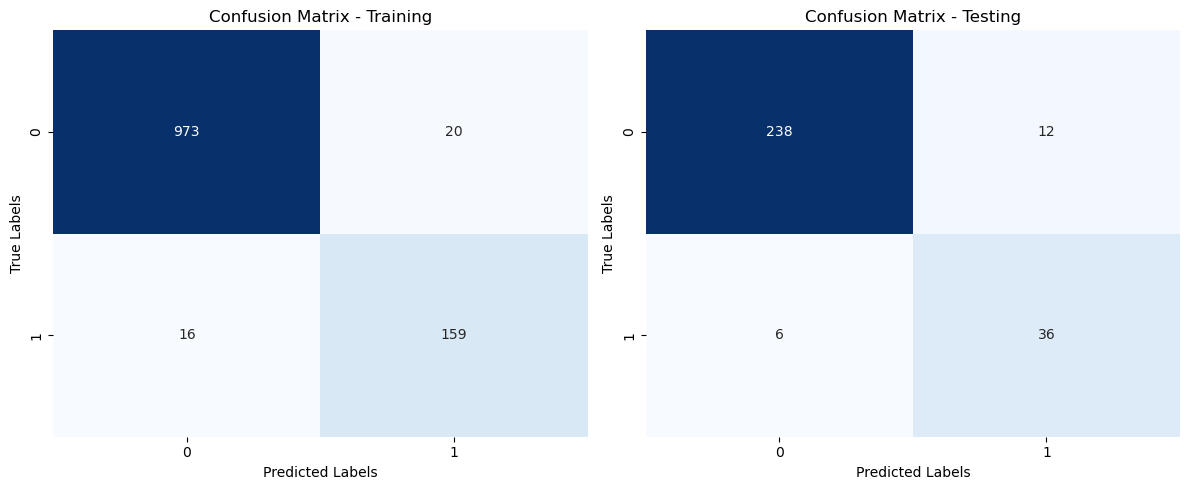

In [28]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
# Calculation consusion matrix
conf_matrix_train_tree = confusion_matrix(y_train, y_train_pred)
conf_matrix_test_tree = confusion_matrix(y_test, y_test_pred)

# Configuring the figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Confusion Matrix - Training
sns.heatmap(conf_matrix_train_tree, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Confusion Matrix - Training')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

# Confusion Matrix - Test
sns.heatmap(conf_matrix_test_tree, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title('Confusion Matrix - Testing')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

# Adjusting the layout
plt.tight_layout()
plt.show()

## Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

## Pipeline

In [30]:
#Creating the full pipeline
full_pipeline_log = make_pipeline(preprocessor, 
                              LogisticRegression()).set_output(transform='pandas')

In [31]:
#Fit
full_pipeline_log.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'Yea...
       'Neighborhood', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtFinType2',
       'HeatingQC', 'Electrical', 'Functional', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('logisticregression', LogisticRegression())])

## Grid Search: Parameter Grid/ Cross Validation

In [32]:
#Create parameter grid
param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "logisticregression__penalty": ["l2"], # Type of penalty
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    "logisticregression__solver": ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"] # Optimization algorithm
}

In [33]:
#Define cross validation
search = GridSearchCV(full_pipeline_log,
                      param_grid,
                      cv=5,
                      verbose=1, 
                      error_score='raise')

In [34]:
#Fit 
search.fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\Irene\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Irene\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Irene\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Irene\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Irene\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Irene\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\Irene\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Irene\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\Irene\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Irene\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Irene\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Irene\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Irene\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Irene\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubCla...
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                  'median'],
                         'logisticregression__C': [0.001, 0.01, 0.1, 1, 10,
                                                   100],
                         'logisticregression__penalty': ['l2'],
                         'logisticregression__solver': ['lbfgs', 'liblinear',
                                                        'newton-cg',
                                                        'newton-cholesky',
                                                        'sag', 'saga']},
             verbose=1)

In [35]:
# Print the best parameters found by GridSearchCV
print("Best parameters found by GridSearchCV:")
print(search.best_params_)

Best parameters found by GridSearchCV:
{'columntransformer__num_pipe__simpleimputer__strategy': 'mean', 'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}


In [36]:
search.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'Yea...
       'Neighborhood', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtFinType2',
       'HeatingQC', 'Electrical', 'Functional', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('logisticregression',
                 LogisticRegression(C=0.1, solver='liblinear'))])

In [37]:
search.best_params_

{'columntransformer__num_pipe__simpleimputer__strategy': 'mean',
 'logisticregression__C': 0.1,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'liblinear'}

In [38]:
y_train_pred = search.predict(x_train)
y_test_pred = search.predict(x_test)

## Accuracy, Precision and Recall

In [39]:
#Training Accuracy
train_accuracy_log = accuracy_score(y_train, y_train_pred)
train_accuracy_rounded_log = round(train_accuracy_log, 4)

print("The training data prediction is {:.2%} accurate Logistic Regress".format(train_accuracy_rounded_log))

The training data prediction is 96.75% accurate Logistic Regress


In [40]:
#Testing Accuracy
test_accuracy_log = accuracy_score(y_test, y_test_pred)
test_accuracy_rounded_log = round(test_accuracy_log, 4)

print("The test data prediction is {:.2%} accurate Logistic Regress".format(test_accuracy_rounded_log))

The test data prediction is 96.92% accurate Logistic Regress


In [41]:
# Training Precision Score
train_precision_log = precision_score(y_train, y_train_pred) 
train_precision_rounded_log = round(train_precision_log, 4)

print("The training data prediction is {:.2%} precision Logistic Regress".format(train_precision_rounded_log))

The training data prediction is 94.19% precision Logistic Regress


In [42]:
#Testing Precision Score 
test_precision_log = precision_score(y_test, y_test_pred) 
test_precision_rounded_log = round(test_precision_log, 4)

print("The test data prediction is {:.2%} precision Logistic Regress".format(test_precision_rounded_log))

The test data prediction is 92.31% precision Logistic Regress


In [43]:
# Training Recall Score
train_recall_log = recall_score(y_train, y_train_pred) 
train_recall_rounded_log = round(train_recall_log, 4)

print("The training data Recall Score is {:.2%} recall Logistic Regress".format(train_recall_rounded_log))

The training data Recall Score is 83.43% recall Logistic Regress


In [44]:
# Testing Recall Score
test_recall_log = recall_score(y_test, y_test_pred) 
test_recall_rounded_log = round(test_recall_log, 4)

print("The test data prediction is {:.2%} recall Logistic Regress".format(test_recall_rounded_log))

The test data prediction is 85.71% recall Logistic Regress


In [45]:
# Confusion Matrix - Training
conf_matrix_train_log = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix - Training:\n", conf_matrix_train_log)

Confusion Matrix - Training:
 [[984   9]
 [ 29 146]]


In [46]:
# Confusion Matrix - Test
conf_matrix_test_log = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix - Testing:\n", conf_matrix_test_log)


Confusion Matrix - Testing:
 [[247   3]
 [  6  36]]


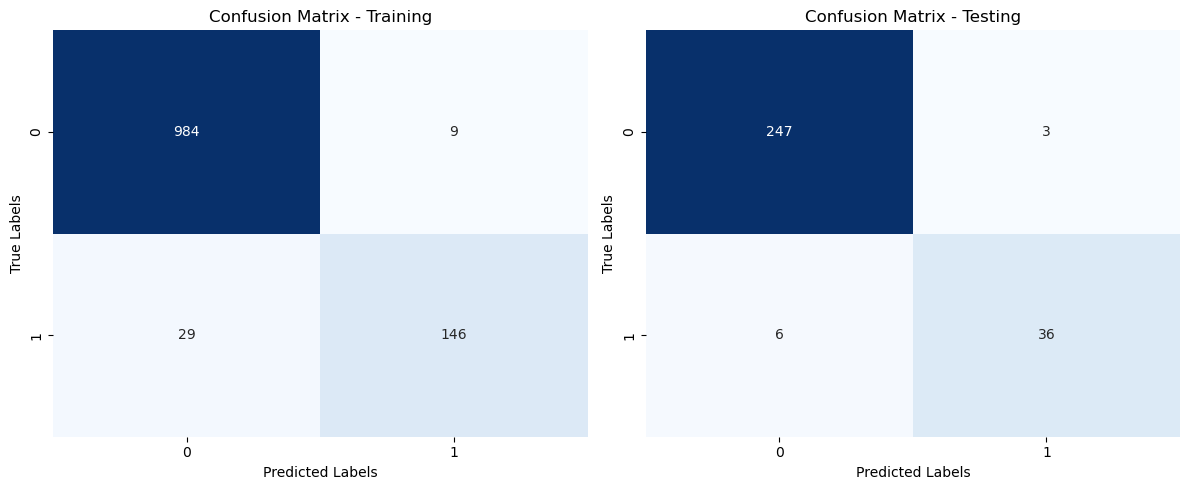

In [47]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculation confusion matrix
conf_matrix_train_log = confusion_matrix(y_train, y_train_pred)
conf_matrix_test_log = confusion_matrix(y_test, y_test_pred)

# Configuring the figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Confusion Matrix - Training
sns.heatmap(conf_matrix_train_log, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Confusion Matrix - Training')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

# Confusion Matrix - Test
sns.heatmap(conf_matrix_test_log, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title('Confusion Matrix - Testing')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

# Adjusting the layout
plt.tight_layout()
plt.show()

In [48]:
# Comparing metrics - Training
print("\nTraining Metrics:")
print("Accuracy: {:.2%}".format(train_accuracy_rounded_log))
print("Precision: {:.2%}".format(train_precision_rounded_log))
print("Recall: {:.2%}".format(train_recall_rounded_log))


Training Metrics:
Accuracy: 96.75%
Precision: 94.19%
Recall: 83.43%


In [49]:
# Comparing metrics - Test
print("\nTesting Metrics:")
print("Accuracy: {:.2%}".format(test_accuracy_rounded_log))
print("Precision: {:.2%}".format(test_precision_rounded_log))
print("Recall: {:.2%}".format(test_recall_rounded_log))


Testing Metrics:
Accuracy: 96.92%
Precision: 92.31%
Recall: 85.71%


In [51]:
metrics_df_log = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Training': [train_accuracy_rounded_log, train_precision_rounded_log, train_recall_rounded_log],
    'Testing': [test_accuracy_rounded_log, test_precision_rounded_log, test_recall_rounded_log]
})

# Exibindo a tabela
print(metrics_df_log)

      Metric  Training  Testing
0   Accuracy    0.9675   0.9692
1  Precision    0.9419   0.9231
2     Recall    0.8343   0.8571


## Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

## Pipeline

In [53]:
#Creating the full pipeline
full_pipeline_RF = make_pipeline(preprocessor, 
                              RandomForestClassifier()).set_output(transform='pandas')

In [54]:
#Fit
full_pipeline_RF.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'Yea...
       'Neighborhood', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtFinType2',
       'HeatingQC', 'Electrical', 'Functional', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('randomforestclassifier', RandomForestClassifier())])

In [56]:
import numpy as np
#Create parameter grid
param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "randomforestclassifier__n_estimators": range(85,105), #the number of trees in the forest
    "randomforestclassifier__max_features": ["log2", "sqrt"], #Determines the number of features to consider when looking for the best split in the decision trees of the forest. "auto" means that all features are considered, while "sqrt" means that only the square root of the number of features are considered.
    "randomforestclassifier__max_depth":range(14,16), #maximum depth of trees
    "randomforestclassifier__min_samples_split":range(2,5), #minimum number of dsamples required to split a node
    "randomforestclassifier__min_samples_leaf":range(8,11) #minimum number of samples required at a leaf node
}

In [57]:
#Define cross validation
search = GridSearchCV(full_pipeline_RF,
                      param_grid,
                      cv=5,
                      verbose=1, 
                      error_score='raise')

In [59]:
#Fit 
search.fit(x_train, y_train)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubCla...
             param_grid={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                  'median'],
                         'randomforestclassifier__max_depth': range(14, 16),
                         'randomforestclassifier__max_features': ['log2',
                                                                  'sqrt'],
                         'randomforestclassifier__min_samples_leaf': range(8, 11),
                         'randomforestclassifier__min_samples_split': range(2, 5),
                         'randomforestclassifier__n_estimators': range(85, 105)},
             verbose=1)

In [ ]:
search.best_params_

In [60]:
# Print the best parameters found by GridSearchCV
print("Best parameters found by GridSearchCV:")
print(search.best_params_)

Best parameters found by GridSearchCV:
{'columntransformer__num_pipe__simpleimputer__strategy': 'mean', 'randomforestclassifier__max_depth': 15, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__min_samples_leaf': 8, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 88}


In [61]:
search.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'Yea...
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtFinType2',
       'HeatingQC', 'Electrical', 'Functional', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=15, min_samples_leaf=8,
                                        n_estimators=88))])

In [62]:
search.best_params_

{'columntransformer__num_pipe__simpleimputer__strategy': 'mean',
 'randomforestclassifier__max_depth': 15,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__min_samples_leaf': 8,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__n_estimators': 88}

## Accuracy, Precision and Recall

In [63]:
y_train_pred = search.predict(x_train)
y_test_pred = search.predict(x_test)

In [64]:
#Training Accuracy
train_accuracy_RF = accuracy_score(y_train, y_train_pred)
train_accuracy_rounded_RF = round(train_accuracy_RF, 4)

print("The training data prediction is {:.2%} accurate Random Forest".format(train_accuracy_rounded_RF))

The training data prediction is 95.98% accurate Random Forest


In [65]:

#Testing Accuracy
test_accuracy_RF = accuracy_score(y_test, y_test_pred)
test_accuracy_rounded_RF = round(test_accuracy_RF, 4)

print("The test data prediction is {:.2%} accurate Random Forest".format(test_accuracy_rounded_RF))

The test data prediction is 95.21% accurate Random Forest


In [78]:
# Assuming y_train and y_train_pred are defined and contain the true labels and predicted labels respectively
train_precision_RF = precision_score(y_train, y_train_pred)
train_precision_rounded_RF = round(train_precision_RF, 4)

# Corrected print statement with closing parenthesis
print("The training data prediction is {:.2%} precision Random Forest".format(train_precision_rounded_RF))


The training data prediction is 95.71% precision Random Forest


In [79]:
#Testing Precision Score 
test_precision_RF = precision_score(y_test, y_test_pred) 
test_precision_rounded_RF = round(test_precision_RF, 4)

print("The test data prediction is {:.2%} precision Random Forest".format(test_precision_rounded_RF))

The test data prediction is 93.75% precision Random Forest


In [80]:
# Training Recall Score
train_recall_RF = recall_score(y_train, y_train_pred) 
train_recall_rounded_RF = round(train_recall_RF, 4)

print("The training data Recall Score is {:.2%} recall Random Forest".format(train_recall_rounded_RF))

The training data Recall Score is 76.57% recall Random Forest


In [81]:
# Testing Recall Score
test_recall_RF = recall_score(y_test, y_test_pred) 
test_recall_rounded_RF = round(test_recall_RF, 4)

print("The test data prediction is {:.2%} recall Random Forest".format(test_recall_rounded_RF))

The test data prediction is 71.43% recall Random Forest


In [82]:
# Confusion Matrix - Training
conf_matrix_train_RF = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix - Training:\n", conf_matrix_train_RF)

Confusion Matrix - Training:
 [[987   6]
 [ 41 134]]


In [83]:
# Confusion Matrix - Test
conf_matrix_test_RF = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix - Testing:\n", conf_matrix_test_RF)


Confusion Matrix - Testing:
 [[248   2]
 [ 12  30]]


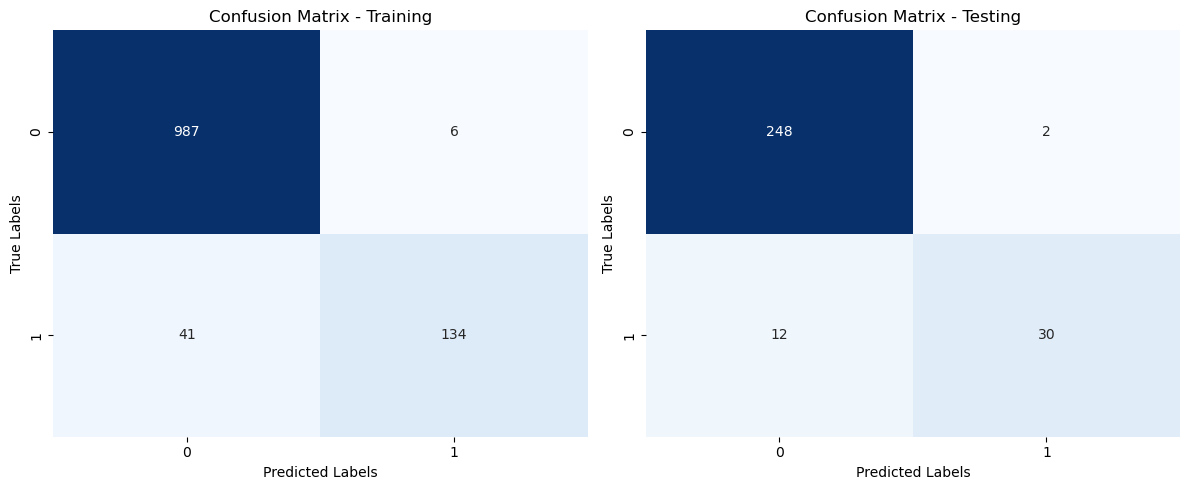

In [84]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculating the confusion matrices
conf_matrix_train_RF = confusion_matrix(y_train, y_train_pred)
conf_matrix_test_RF = confusion_matrix(y_test, y_test_pred)

# Configuring the figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Confusion Matrix - Training
sns.heatmap(conf_matrix_train_RF, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Confusion Matrix - Training')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

# Confusion Matrix - Test
sns.heatmap(conf_matrix_test_RF, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title('Confusion Matrix - Testing')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

# Adjusting the layout
plt.tight_layout()
plt.show()

In [85]:
# Comparing metrics - Training
print("\nTraining Metrics:")
print("Accuracy: {:.2%}".format(train_accuracy_rounded_RF))
print("Precision: {:.2%}".format(train_precision_rounded_RF))
print("Recall: {:.2%}".format(train_recall_rounded_RF)) 


Training Metrics:
Accuracy: 95.98%
Precision: 95.71%
Recall: 76.57%


In [87]:
# Assuming test_accuracy_rounded_RF, test_precision_rounded_RF, and test_recall_rounded_RF are defined and contain the rounded metrics for the test data
print("\nTesting Metrics:")
print("Accuracy: {:.2%}".format(test_accuracy_rounded_RF))
print("Precision: {:.2%}".format(test_precision_rounded_RF))
# Corrected print statement with closing parenthesis
print("Recall: {:.2%}".format(test_recall_rounded_RF))



Testing Metrics:
Accuracy: 95.21%
Precision: 93.75%
Recall: 71.43%


In [88]:
metrics_df_RF = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Training': [train_accuracy_rounded_RF, train_precision_rounded_RF, train_recall_rounded_RF],
    'Testing': [test_accuracy_rounded_RF, test_precision_rounded_RF, test_recall_rounded_RF]
})

# Exibindo a tabela
print(metrics_df_RF)

      Metric  Training  Testing
0   Accuracy    0.9598   0.9521
1  Precision    0.9571   0.9375
2     Recall    0.7657   0.7143


## Using K-Nearest Neighbors

In [89]:
from sklearn.neighbors import KNeighborsClassifier

In [90]:
#Creating the full pipeline
full_pipeline_KNN = make_pipeline(preprocessor, 
                              KNeighborsClassifier()).set_output(transform='pandas')

In [91]:
#Fit
full_pipeline_KNN.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'Yea...
       'Neighborhood', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtFinType2',
       'HeatingQC', 'Electrical', 'Functional', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [92]:
#Create parameter grid
param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"], #allows different columns of the input data to be transformed by mean or median
    "kneighborsclassifier__n_neighbors": range(2, 17), # odd number guarantees that there will be no tie and is more robust against situations where classes are unevenly distributed.
    "kneighborsclassifier__p": range(1, 2), # Now ranging from 1 to 2 to include Manhattan (1) and Euclidean (2) distance. 
    'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm to calculate neighbors
    "kneighborsclassifier__weights":["uniform", "distance"] #specifies the weight function used in prediction, "uniform": All points in each neighborhood are weighted equally. This is the default.
                                                            #"distance": Weights points by the inverse of their distance. In this case, nearer neighbors will have a greater influence than those further away.
    
}

In [93]:
# Create grid search - Define GridSearchCV
search = GridSearchCV(full_pipeline_KNN,
                      param_grid,
                      cv=5,
                      verbose=1, 
                      error_score='raise')

In [94]:
#Fit 
search.fit(x_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubCla...
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                  'median'],
                         'kneighborsclassifier__algorithm': ['auto',
                                                             'ball_tree',
                                                             'kd_tree',
                                                             'brute'],
                         'kneighborsclassifier__n_neighbors': range(2, 17),
                         'kneighborsclassifier__p': range(1, 2),
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']},
             verbose=1)

In [ ]:
# Print the best parameters found by GridSearchCV
print("Best parameters found by GridSearchCV:")
print(search.best_params_)

In [95]:
search.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'Yea...
       'Neighborhood', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtFinType2',
       'HeatingQC', 'Electrical', 'Functional', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=8, p=1, weights='distance'))])

## Accuracy, Precision and Recall

In [96]:
y_train_pred = search.predict(x_train)
y_test_pred = search.predict(x_test)

In [97]:
#Training Accuracy
train_accuracy_KNN = accuracy_score(y_train, y_train_pred)
train_accuracy_rounded_KNN = round(train_accuracy_KNN, 4)

print("The training data prediction is {:.2%} accurate KNN".format(train_accuracy_rounded_KNN))

The training data prediction is 100.00% accurate KNN


In [98]:
# Training Precision Score
train_precision_KNN = precision_score(y_train, y_train_pred) 
train_precision_rounded_KNN = round(train_precision_KNN, 4)

print("The training data prediction is {:.2%} precision KNN".format(train_precision_rounded_KNN))

The training data prediction is 100.00% precision KNN


In [99]:
#Testing Precision Score 
test_precision_KNN = precision_score(y_test, y_test_pred) 
test_precision_rounded_KNN = round(test_precision_KNN, 4)

print("The test data prediction is {:.2%} precision KNN".format(test_precision_rounded_KNN))

The test data prediction is 100.00% precision KNN


In [100]:
# Training Recall Score
train_recall_KNN = recall_score(y_train, y_train_pred) 
train_recall_rounded_KNN = round(train_recall_KNN, 4)

print("The training data Recall Score is {:.2%} recall KNN".format(train_recall_rounded_KNN))

The training data Recall Score is 100.00% recall KNN


In [101]:
# Testing Recall Score
test_recall_KNN = recall_score(y_test, y_test_pred) 
test_recall_rounded_KNN = round(test_recall_KNN, 4)

print("The test data prediction is {:.2%} recall KNN".format(test_recall_rounded_KNN))

The test data prediction is 66.67% recall KNN


In [102]:
# Confusion Matrix - Training
conf_matrix_train_KNN = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix - Training:\n", conf_matrix_train_KNN)

Confusion Matrix - Training:
 [[993   0]
 [  0 175]]


In [103]:
# Confusion Matrix - Test
conf_matrix_test_KNN = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix - Testing:\n", conf_matrix_test_KNN)


Confusion Matrix - Testing:
 [[250   0]
 [ 14  28]]


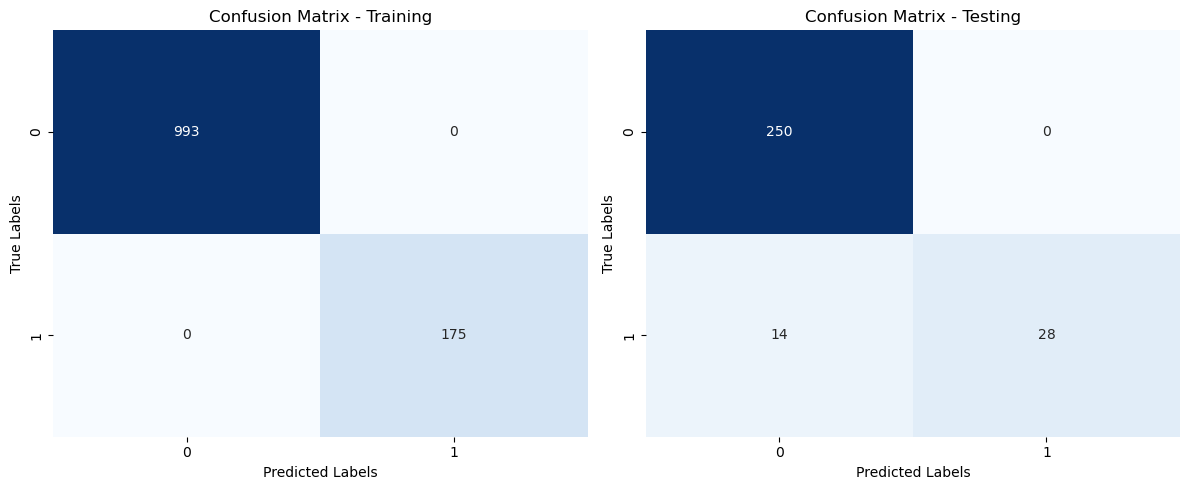

In [104]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculating confusuon matrix
conf_matrix_train_KNN = confusion_matrix(y_train, y_train_pred)
conf_matrix_test_KNN = confusion_matrix(y_test, y_test_pred)

# Configuring the figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Confusion Matrix - Training
sns.heatmap(conf_matrix_train_KNN, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Confusion Matrix - Training')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

# Confusion Matrix - Test
sns.heatmap(conf_matrix_test_KNN, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title('Confusion Matrix - Testing')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

# Adjusting the layout
plt.tight_layout()
plt.show()

In [105]:
# Comparing metrics - Training
print("\nTraining Metrics:")
print("Accuracy: {:.2%}".format(train_accuracy_rounded_KNN))
print("Precision: {:.2%}".format(train_precision_rounded_KNN))
print("Recall: {:.2%}".format(train_recall_rounded_KNN)) 


Training Metrics:
Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%


In [109]:
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [111]:
# Calculate metrics
test_accuracy_KNN = accuracy_score(y_test, y_test_pred)
test_precision_KNN = precision_score(y_test, y_test_pred, average='binary') # Adjust 'average' as needed
test_recall_KNN = recall_score(y_test, y_test_pred, average='binary') # Adjust 'average' as needed

# Round metrics
test_accuracy_rounded_KNN = round(test_accuracy_KNN, 4)
test_precision_rounded_KNN = round(test_precision_KNN, 4)
test_recall_rounded_KNN = round(test_recall_KNN, 4)

# Now you should be able to print without errors
print("\nTesting Metrics:")
print("Accuracy: {:.2%}".format(test_accuracy_rounded_KNN))
print("Precision: {:.2%}".format(test_precision_rounded_KNN))
print("Recall: {:.2%}".format(test_recall_rounded_KNN))



Testing Metrics:
Accuracy: 95.21%
Precision: 100.00%
Recall: 66.67%


In [112]:
# Criando um DataFrame
metrics_df_KNN = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Training': [train_accuracy_rounded_KNN, train_precision_rounded_KNN, train_recall_rounded_KNN],
    'Testing': [test_accuracy_rounded_KNN, test_precision_rounded_KNN, test_recall_rounded_KNN]
})

print(metrics_df_KNN)

      Metric  Training  Testing
0   Accuracy       1.0   0.9521
1  Precision       1.0   1.0000
2     Recall       1.0   0.6667
